<a href="https://colab.research.google.com/github/uceku95/Customer-churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset**

In [ ]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [ ]:

df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


**Counting the missing values**

In [ ]:
df.dropna()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
df.shape

(100000, 9)

**Detecting outliers using boxplot**

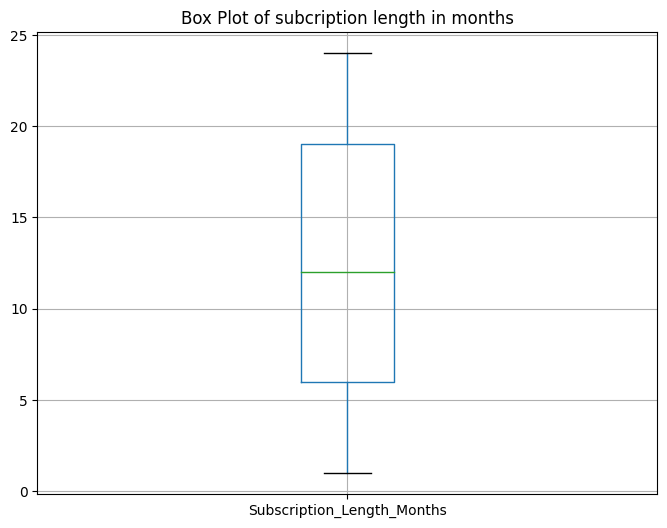

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column="Subscription_Length_Months")
plt.title("Box Plot of subcription length in months")
plt.show()

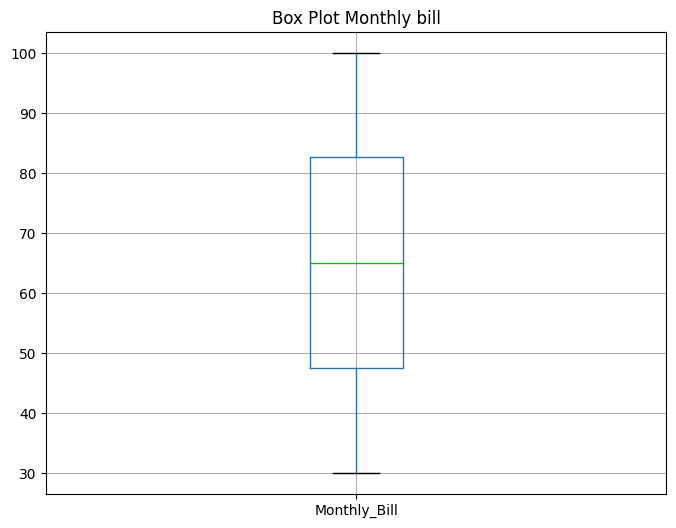

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column="Monthly_Bill")
plt.title("Box Plot Monthly bill")
plt.show()

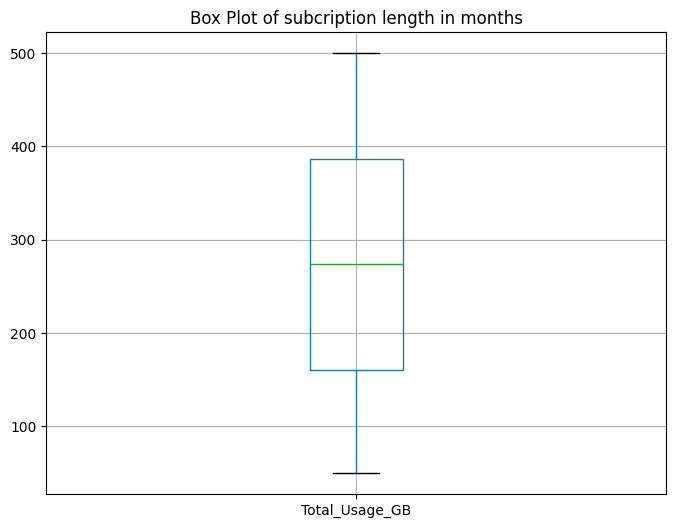

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column="Total_Usage_GB")
plt.title("Box Plot of subcription length in months")
plt.show()

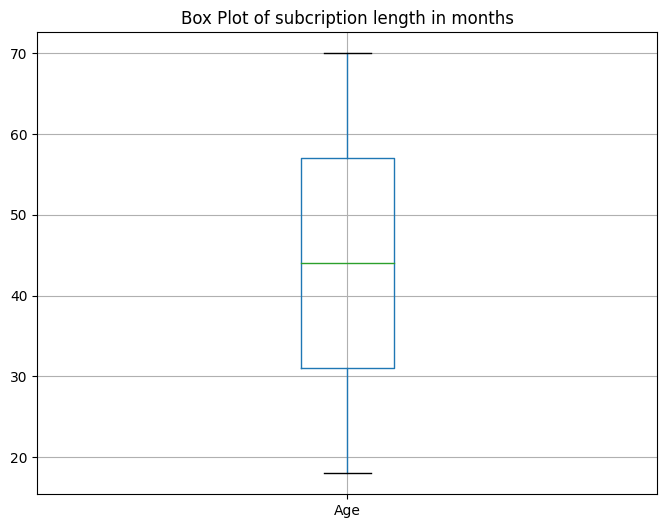

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column="Age")
plt.title("Box Plot of subcription length in months")
plt.show()

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<ipython-input-22-4ac392a244e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

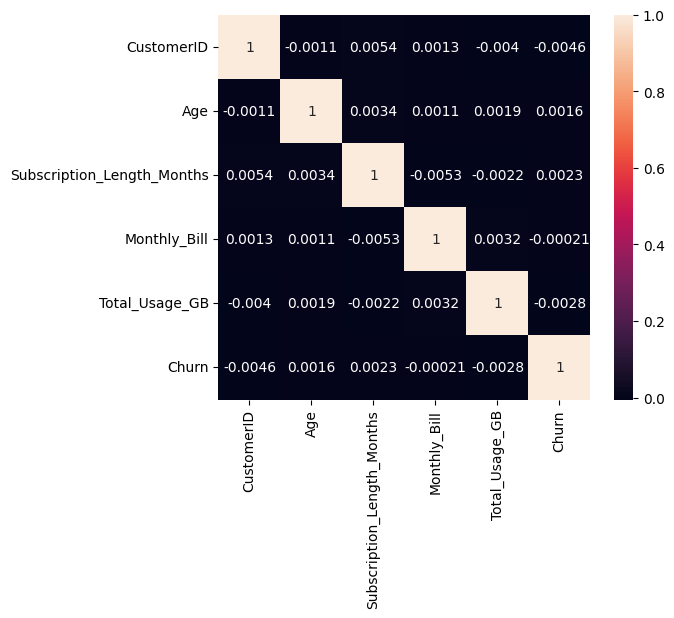

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)

**Splitting data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
onehot_encoder = OneHotEncoder(sparse=False)
encoded_location = onehot_encoder.fit_transform(df[['Location']])
encoded_location_df = pd.DataFrame(encoded_location, columns=[f'Location_{i}' for i in range(encoded_location.shape[1])])

# Concatenate the one-hot encoded columns with the rest of the features
data_encoded = pd.concat([df, encoded_location_df], axis=1)

# Split data into features (X) and target (y)
X = data_encoded.drop(['Churn', 'CustomerID', 'Name', 'Location'], axis=1)
y = data_encoded['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Feature Engineering**

In [ ]:
# Applying feature scaling or normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

**Model Optimization**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a LogisticRegression model
lr_model = LogisticRegression(random_state=42)

# Perform randomized hyperparameter search
random_search = RandomizedSearchCV(
    lr_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1
)
random_search.fit(X_train_scaled, y_train)



**Model** **Evaluation**

In [ ]:

best_lr_model = random_search.best_estimator_
y_pred = best_lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
lr_model.fit(X_train_scaled, y_train)

**Pickling for deployment**

In [ ]:
import pickle
pickle.dump(best_lr_model, open('churn_predi_model.pkl', 'wb'))
model_loaded= pickle.load(open('churn_predi_model.pkl', 'rb'))